In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows me to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10504,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.952364e+07,1.952364e+07,False,NaN,1,NaN,NaN,None,2023-10-25T14:21:00.000Z,34387.253604,3.006835e+10,-42.4508,-0.406930,0.631136,21.314326,31.615020,32.131010,16.885075,6.713643e+11,53.2854,7.221323e+11,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
1,1027,Ethereum,ETH,ethereum,7618,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202626e+08,1.202626e+08,True,NaN,2,NaN,NaN,None,2023-10-25T14:21:00.000Z,1790.920991,1.073488e+10,-41.1445,-0.139466,-1.357722,13.555524,13.775080,8.588234,-4.431066,2.153809e+11,17.0720,2.153809e+11,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
2,825,Tether USDt,USDT,tether,64297,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.425669e+10,8.762567e+10,True,NaN,3,NaN,NaN,None,2023-10-25T14:21:00.000Z,1.000194,4.143799e+10,-38.7398,0.017348,-0.016263,-0.023409,0.047191,0.082840,0.026818,8.427302e+10,6.6887,8.764265e+10,None,2023-10-25T14:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-25 17:22:43.601061
3,1839,BNB,BNB,bnb,1698,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517046e+08,1.517046e+08,False,NaN,4,NaN,NaN,None,2023-10-25T14:21:00.000Z,224.970005,4.452445e+08,-43.7692,-0.170741,-2.038719,6.112149,7.904156,3.678579,-6.683795,3.412898e+10,2.7088,3.412898e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
4,52,XRP,XRP,xrp,1121,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-25T14:21:00.000Z,0.553227,1.756835e+09,-32.0626,-0.048848,-4.120758,13.151879,11.283977,5.582598,-22.732681,2.956501e+10,2.3434,5.532267e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
5,3408,USDC,USDC,usd-coin,14587,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.503060e+10,2.503060e+10,False,NaN,6,NaN,NaN,None,2023-10-25T14:21:00.000Z,1.000126,6.084158e+09,-29.8421,0.008790,-0.004372,0.006809,0.009413,0.006605,0.010140,2.503376e+10,1.9869,2.503376e+10,None,2023-10-25T14:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-25 17:22:43.601061
6,5426,Solana,SOL,solana,538,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.178137e+08,5.607289e+08,True,NaN,7,NaN,NaN,None,2023-10-25T14:21:00.000Z,32.755340,1.592135e+09,5.1574,-1.999316,4.007947,37.721934,67.384992,61.680838,28.730227,1.368563e+10,1.0848,1.836687e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
7,2010,Cardano,ADA,cardano,953,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.523112e+10,3.628981e+10,False,NaN,8,NaN,NaN,None,2023-10-25T14:21:00.000Z,0.284100,2.736951e+08,-34.8450,0.540927,-1.405796,15.444017,16.204148,9.362647,-8.152460,1.000917e+10,0.7944,1.278452e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
8,74,Dogecoin,DOGE,dogecoin,813,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.

In [5]:
import os
from time import sleep
import pandas as pd
from requests import Session

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = response.json()
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    # Create a DataFrame for the current data
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    return df2

# Initialize an empty list to store DataFrames
data_frames = []

for i in range(5):  # Set the number of iterations to 5
    df2 = api_runner()
    data_frames.append(df2)
    sleep(60)  # Sleep for 1 minute

# Concatenate all DataFrames in the list into one
combined_df = pd.concat(data_frames, ignore_index=True)

# After the loop, `combined_df` will contain all the data from each iteration
print(combined_df)

# Print the shape and first few rows of the combined_df
print(f"Shape of combined_df: {combined_df.shape}")
print(f"First few rows of combined_df:\n{combined_df.head()}")

       id             name symbol             slug  num_market_pairs  \
0       1          Bitcoin    BTC          bitcoin             10504   
1    1027         Ethereum    ETH         ethereum              7618   
2     825      Tether USDt   USDT           tether             64297   
3    1839              BNB    BNB              bnb              1698   
4      52              XRP    XRP              xrp              1121   
5    3408             USDC   USDC         usd-coin             14587   
6    5426           Solana    SOL           solana               538   
7    2010          Cardano    ADA          cardano               953   
8      74         Dogecoin   DOGE         dogecoin               813   
9    1958             TRON    TRX             tron               853   
10  11419          Toncoin    TON          toncoin               159   
11   1975        Chainlink   LINK        chainlink              1381   
12   3890          Polygon  MATIC          polygon              

In [6]:
import os
from time import sleep
import pandas as pd
from requests import Session

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = response.json()
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    # Create a DataFrame for the current data
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    return df2

# Initialize an empty list to store DataFrames
data_frames = []

for i in range(5):  # Set the number of iterations to 5
    df2 = api_runner()
    data_frames.append(df2)
    sleep(60)  # Sleep for 1 minute

# Concatenate all DataFrames in the list into one
combined_df = pd.concat(data_frames, ignore_index=True)

# After the loop, `combined_df` will contain all the data from each iteration
print(combined_df)


       id             name symbol             slug  num_market_pairs  \
0       1          Bitcoin    BTC          bitcoin             10504   
1    1027         Ethereum    ETH         ethereum              7618   
2     825      Tether USDt   USDT           tether             64298   
3    1839              BNB    BNB              bnb              1698   
4      52              XRP    XRP              xrp              1121   
5    3408             USDC   USDC         usd-coin             14587   
6    5426           Solana    SOL           solana               538   
7    2010          Cardano    ADA          cardano               953   
8      74         Dogecoin   DOGE         dogecoin               813   
9    1958             TRON    TRX             tron               853   
10  11419          Toncoin    TON          toncoin               159   
11   1975        Chainlink   LINK        chainlink              1381   
12   3890          Polygon  MATIC          polygon              

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10504,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.952364e+07,1.952364e+07,False,NaN,1,NaN,NaN,None,2023-10-25T14:21:00.000Z,34387.253604,3.006835e+10,-42.4508,-0.406930,0.631136,21.314326,31.615020,32.131010,16.885075,6.713643e+11,53.2854,7.221323e+11,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
1,1027,Ethereum,ETH,ethereum,7618,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202626e+08,1.202626e+08,True,NaN,2,NaN,NaN,None,2023-10-25T14:21:00.000Z,1790.920991,1.073488e+10,-41.1445,-0.139466,-1.357722,13.555524,13.775080,8.588234,-4.431066,2.153809e+11,17.0720,2.153809e+11,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
2,825,Tether USDt,USDT,tether,64297,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.425669e+10,8.762567e+10,True,NaN,3,NaN,NaN,None,2023-10-25T14:21:00.000Z,1.000194,4.143799e+10,-38.7398,0.017348,-0.016263,-0.023409,0.047191,0.082840,0.026818,8.427302e+10,6.6887,8.764265e+10,None,2023-10-25T14:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-25 17:22:43.601061
3,1839,BNB,BNB,bnb,1698,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517046e+08,1.517046e+08,False,NaN,4,NaN,NaN,None,2023-10-25T14:21:00.000Z,224.970005,4.452445e+08,-43.7692,-0.170741,-2.038719,6.112149,7.904156,3.678579,-6.683795,3.412898e+10,2.7088,3.412898e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
4,52,XRP,XRP,xrp,1121,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-25T14:21:00.000Z,0.553227,1.756835e+09,-32.0626,-0.048848,-4.120758,13.151879,11.283977,5.582598,-22.732681,2.956501e+10,2.3434,5.532267e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
5,3408,USDC,USDC,usd-coin,14587,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.503060e+10,2.503060e+10,False,NaN,6,NaN,NaN,None,2023-10-25T14:21:00.000Z,1.000126,6.084158e+09,-29.8421,0.008790,-0.004372,0.006809,0.009413,0.006605,0.010140,2.503376e+10,1.9869,2.503376e+10,None,2023-10-25T14:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-25 17:22:43.601061
6,5426,Solana,SOL,solana,538,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.178137e+08,5.607289e+08,True,NaN,7,NaN,NaN,None,2023-10-25T14:21:00.000Z,32.755340,1.592135e+09,5.1574,-1.999316,4.007947,37.721934,67.384992,61.680838,28.730227,1.368563e+10,1.0848,1.836687e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
7,2010,Cardano,ADA,cardano,953,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.523112e+10,3.628981e+10,False,NaN,8,NaN,NaN,None,2023-10-25T14:21:00.000Z,0.284100,2.736951e+08,-34.8450,0.540927,-1.405796,15.444017,16.204148,9.362647,-8.152460,1.000917e+10,0.7944,1.278452e+10,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
8,74,Dogecoin,DOGE,dogecoin,813,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10504,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19523637.00000,19523637.00000,False,NaN,1,NaN,NaN,None,2023-10-25T14:21:00.000Z,34387.25360,30068350063.41351,-42.45080,-0.40693,0.63114,21.31433,31.61502,32.13101,16.88508,671364256798.56873,53.28540,722132325691.67004,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
1,1027,Ethereum,ETH,ethereum,7618,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120262637.95097,120262637.95097,True,NaN,2,NaN,NaN,None,2023-10-25T14:21:00.000Z,1790.92099,10734882830.98310,-41.14450,-0.13947,-1.35772,13.55552,13.77508,8.58823,-4.43107,215380882746.76910,17.07200,215380882746.76999,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
2,825,Tether USDt,USDT,tether,64297,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,84256686740.46358,87625667476.78386,True,NaN,3,NaN,NaN,None,2023-10-25T14:21:00.000Z,1.00019,41437989999.28268,-38.73980,0.01735,-0.01626,-0.02341,0.04719,0.08284,0.02682,84273020264.30148,6.68870,87642654092.14000,None,2023-10-25T14:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-25 17:22:43.601061
3,1839,BNB,BNB,bnb,1698,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151704585.45380,151704585.45380,False,NaN,4,NaN,NaN,None,2023-10-25T14:21:00.000Z,224.97001,445244489.25609,-43.76920,-0.17074,-2.03872,6.11215,7.90416,3.67858,-6.68380,34128981389.52878,2.70880,34128981389.53000,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
4,52,XRP,XRP,xrp,1121,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-25T14:21:00.000Z,0.55323,1756834886.99161,-32.06260,-0.04885,-4.12076,13.15188,11.28398,5.58260,-22.73268,29565005265.17289,2.34340,55322673819.00000,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
5,3408,USDC,USDC,usd-coin,14587,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25030600717.47717,25030600717.47717,False,NaN,6,NaN,NaN,None,2023-10-25T14:21:00.000Z,1.00013,6084157663.59400,-29.84210,0.00879,-0.00437,0.00681,0.00941,0.00661,0.01014,25033760318.85975,1.98690,25033760318.86000,None,2023-10-25T14:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-25 17:22:43.601061
6,5426,Solana,SOL,solana,538,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,417813716.21485,560728927.34698,True,NaN,7,NaN,NaN,None,2023-10-25T14:21:00.000Z,32.75534,1592135138.48620,5.15740,-1.99932,4.00795,37.72193,67.38499,61.68084,28.73023,13685630298.77260,1.08480,18366866619.46000,None,2023-10-25T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 17:22:43.601061
7,2010,Cardano,ADA,cardano,953,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35231121850.46300,36289808363.50800,False,NaN,8,NaN,NaN,None,2023-10-25T14:21:00.000Z,0.28410,273695075.55098,-34.84500,0.54093,-1.40580,15.44402,16.20415,9.36265,-8.15246,10009173636.34253,0.79440,12784515223.42000,None,2023-10-25T14:21:00.000Z,Na

In [10]:
# Now I want look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.40693,0.63114,21.31433,31.61502,32.13101,16.88508
Ethereum,-0.13947,-1.35772,13.55552,13.77508,8.58823,-4.43107
Tether USDt,0.01735,-0.01626,-0.02341,0.04719,0.08284,0.02682
BNB,-0.17074,-2.03872,6.11215,7.90416,3.67858,-6.68380
XRP,-0.04885,-4.12076,13.15188,11.28398,5.58260,-22.73268
USDC,0.00879,-0.00437,0.00681,0.00941,0.00661,0.01014
Solana,-1.99932,4.00795,37.72193,67.38499,61.68084,28.73023
Cardano,0.54093,-1.40580,15.44402,16.20415,9.36265,-8.15246
Dogecoin,0.17875,-2.06741,13.12277,9.11594,5.52571,-16.04152


In [11]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.40693
                 quote.USD.percent_change_24h     0.63114
                 quote.USD.percent_change_7d     21.31433
                 quote.USD.percent_change_30d    31.61502
                 quote.USD.percent_change_60d    32.13101
                 quote.USD.percent_change_90d    16.88508
Ethereum         quote.USD.percent_change_1h     -0.13947
                 quote.USD.percent_change_24h    -1.35772
                 quote.USD.percent_change_7d     13.55552
                 quote.USD.percent_change_30d    13.77508
                 quote.USD.percent_change_60d     8.58823
                 quote.USD.percent_change_90d    -4.43107
Tether USDt      quote.USD.percent_change_1h      0.01735
                 quote.USD.percent_change_24h    -0.01626
                 quote.USD.percent_change_7d     -0.02341
                 quote.USD.percent_change_30d     0.04719
                 quote.USD

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.40693
                quote.USD.percent_change_24h   0.63114
                quote.USD.percent_change_7d   21.31433
                quote.USD.percent_change_30d  31.61502
                quote.USD.percent_change_60d  32.13101
                quote.USD.percent_change_90d  16.88508
Ethereum        quote.USD.percent_change_1h   -0.13947
                quote.USD.percent_change_24h  -1.35772
                quote.USD.percent_change_7d   13.55552
                quote.USD.percent_change_30d  13.77508
                quote.USD.percent_change_60d   8.58823
                quote.USD.percent_change_90d  -4.43107
Tether USDt     quote.USD.percent_change_1h    0.01735
                quote.USD.percent_change_24h  -0.01626
                quote.USD.percent_change_7d   -0.02341
                quote.USD.percent_change_30d   0.04719
                quote.USD.percent_change_60d   0.08284
                quote.USD.percent_change_90d   0.02682
BNB             quote.USD.percent_change_1h   -0.17074
                quote.USD.percent_change_24h  -2.03872
                quote.USD.percent_change_7d    6.11215
                quote.USD.percent_change_30d   7.90416
                quote.USD.percent_change_60d   3.67858
                quote.USD.percent_change_90d  -6.68380
XRP             quote.USD.percent_change_1h   -0.04885
                quote.USD.percent_change_24h  -4.12076
                quote.USD.percent_change_7d   13.15188
                quote.USD.percent_change_30d  11.28398
                quote.USD.percent_change_60d   5.58260
                quote.USD.percent_change_90d -22.73268
USDC            quote.USD.percent_change_1h    0.00879
                quote.USD.percent_change_24h  -0.00437
                quote.USD.percent_change_7d    0.00681
                quote.USD.percent_change_30d   0.00941
                quote.USD.percent_change_60d   0.00661
                quote.USD.percent_change_90d   0.01014
Solana          quote.USD.percent_change_1h   -1.99932
                quote.USD.percent_change_24h   4.00795
                quote.USD.percent_change_7d   37.72193
                quote.USD.percent_change_30d  67.38499
                quote.USD.percent_change_60d  61.68084
                quote.USD.percent_change_90d  28.73023
Cardano         quote.USD.percent_change_1h    0.54093
                quote.USD.percent_change_24h  -1.40580
                quote.USD.percent_change_7d   15.44402
                quote.USD.percent_change_30d  16.20415
                quote.USD.percent_change_60d   9.36265
                quote.USD.percent_change_90d  -8.15246
Dogecoin        quote.USD.percent_change_1h    0.17875
                quote.USD.percent_change_24h  -2.06741
                quote.USD.percent_change_7d   13.12277
                quote.USD.percent_change_30d   9.11594
                quote.USD.percent_change_60d   5.52571
                quote.USD.percent_change_90d -16.04152
TRON            quote.USD.percent_change_1h   -0.13665
                quote.USD.percent_change_24h   0.02915
                quote.USD.percent_change_7d    4.39514
                quote.USD.percent_change_30d  10.92349
                quote.USD.percent_change_60d  20.36361
                quote.USD.percent_change_90d  13.01325
Toncoin         quote.USD.percent_change_1h   -0.26324
                quote.USD.percent_change_24h  -4.27563
                quote.USD.percent_change_7d    4.74173
                quote.USD.percent_change_30d  -1.87391
                quote.USD.percent_change_60d  48.30715
                quote.USD.percent_change_90d  57.12789
Chainlink       quote.USD.percent_change_1h   -0.20578
                quote.USD.percent_change_24h   7.81660
                quote.USD.percent_change_7d   49.56919
                quote.USD.percent_change_30d  52.83964
                quote.USD.percent_change_60d  84.58811
                quote.USD.percent

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
#Because of how it's structured above, I need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. 

index = pd.Index(range(90))


df6 = df5.set_index(index)
df6

,values
0,-0.40693
1,0.63114
2,21.31433
3,31.61502
4,32.13101
5,16.88508
6,-0.13947
7,-1.35772
8,13.55552
9,13.77508


In [16]:
#I Changed the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,-0.40693
1,0.63114
2,21.31433
3,31.61502
4,32.13101
5,16.88508
6,-0.13947
7,-1.35772
8,13.55552
9,13.77508


In [17]:
import pandas as pd

# Sample DataFrame
data = {'some_other_column': [10, 20, 30, 40],
        'quote.USD.percent_change_24h': [5, -2, 7, 9],
        'quote.USD.percent_change_7d': [15, -5, 9, 12]}

df7 = pd.DataFrame(data)

# Check if the column exists in the DataFrame
column_name = 'percent_change'
if column_name in df7:
    replacement_dict = {
        'quote.USD.percent_change_24h': '24h',
        'quote.USD.percent_change_7d': '7d'
        # Add other mappings as needed
    }

    df7[column_name] = df7[column_name].replace(replacement_dict)

# Print the DataFrame
print(df7)

   some_other_column  quote.USD.percent_change_24h  \
0                 10                             5   
1                 20                            -2   
2                 30                             7   
3                 40                             9   

   quote.USD.percent_change_7d  
0                           15  
1                           -5  
2                            9  
3                           12  


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

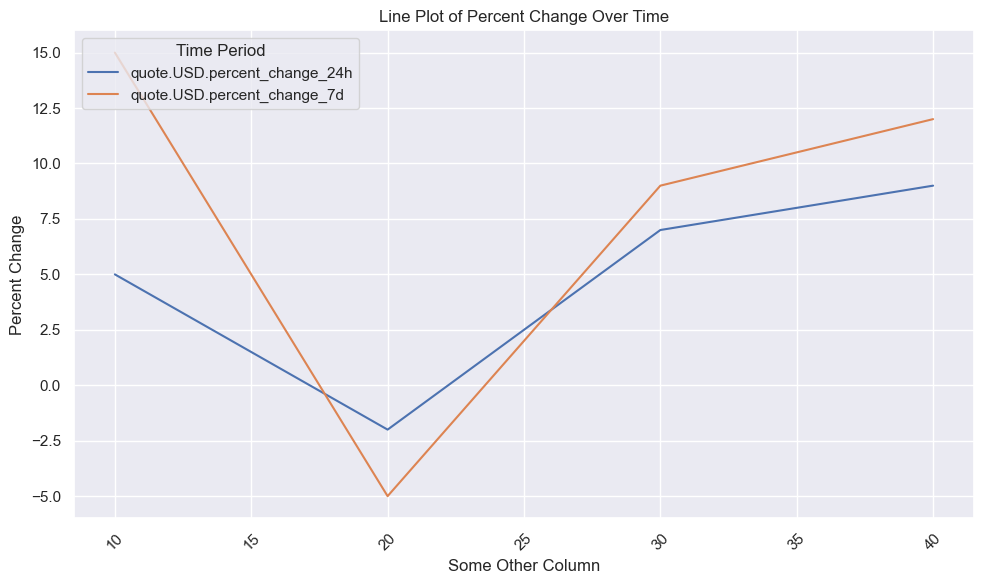

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to reshape it
melted_df7 = df7.melt(id_vars='some_other_column', 
                   value_vars=['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d'],
                   var_name='Percent Change Period', 
                   value_name='Percent Change')

# Create a line plot using Seaborn
sns.set_style("whitegrid")  # Set the plot style
sns.set(rc={"figure.figsize":(10, 6)})  # Set the figure size

# Use Seaborn to create a line plot
plot = sns.lineplot(data=melted_df7, x='some_other_column', y='Percent Change', hue='Percent Change Period')

# Set labels and title
plot.set(xlabel='Some Other Column', ylabel='Percent Change', title='Line Plot of Percent Change Over Time')

# Show the plot
plt.legend(title='Time Period', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [20]:
import seaborn as sns


In [21]:
# Now to do something much simpler
#I am going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,34387.25360,2023-10-25 17:22:43.601061


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

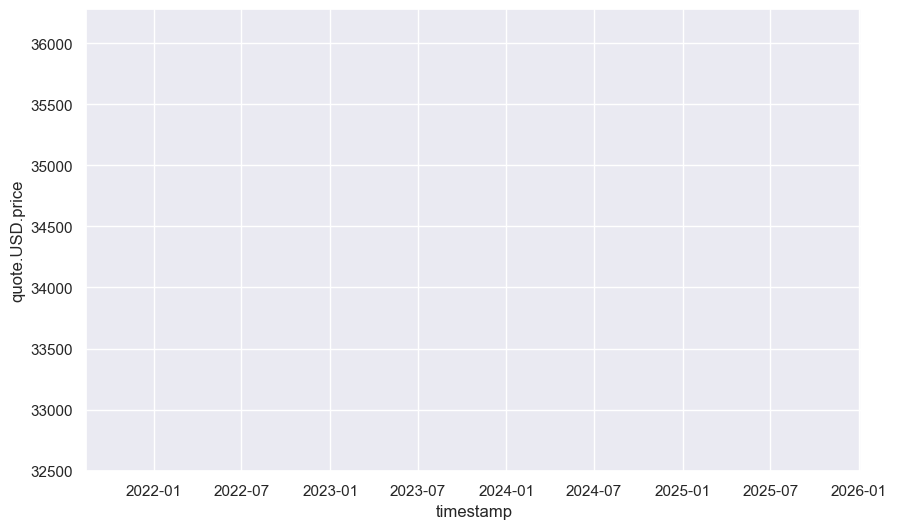

In [22]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)